# Exploración Inicial de Datos

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Definir el path principal
path = "/home/mariopasc/Python/Datasets/Coronariografias/CADICA"
selected_videos_path = os.path.join(path, 'selectedVideos')
patients_folders = np.sort(os.listdir(selected_videos_path))

# Inicializar listas para almacenar los datos
patient_list = []
videos_list = []
frames_list = []
selected_frames_list = []
lesion_videos_list = []
non_lesion_videos_list = []

for patient in patients_folders:
    video_folders = np.sort(os.listdir(os.path.join(selected_videos_path, patient)))
    num_videos = 0
    num_frames = 0
    selected_frames = []
    lesion_videos = []
    non_lesion_videos = []

    for video in video_folders:
        if video not in ['lesionVideos.txt', 'nonlesionVideos.txt']:
            num_videos += 1
            video_path = os.path.join(selected_videos_path, patient, video)
            frames = [f for f in os.listdir(os.path.join(video_path, "input")) if f.endswith('.png')]
            num_frames += len(frames)

            # Buscar el archivo .txt de frames seleccionados
            txt_files = [f for f in os.listdir(video_path) if f.endswith('.txt')]
            if txt_files:
                txt_file_path = os.path.join(video_path, txt_files[0])  # Suponemos que solo hay un .txt
                with open(txt_file_path, 'r') as file:
                    selected_frames.extend([line.strip() for line in file])

    # Leer los archivos lesionVideos.txt y nonLesionVideos.txt
    lesion_txt_path = os.path.join(selected_videos_path, patient, 'lesionVideos.txt')
    non_lesion_txt_path = os.path.join(selected_videos_path, patient, 'nonlesionVideos.txt')
    
    if os.path.isfile(lesion_txt_path):
        with open(lesion_txt_path, 'r') as file:
            lesion_videos = [line.strip() for line in file]
    
    if os.path.isfile(non_lesion_txt_path):
        with open(non_lesion_txt_path, 'r') as file:
            non_lesion_videos = [line.strip() for line in file]

    # Almacenar los datos en las listas
    patient_list.append(patient)
    videos_list.append(num_videos)
    frames_list.append(num_frames)
    selected_frames_list.append(selected_frames)
    lesion_videos_list.append(lesion_videos)
    non_lesion_videos_list.append(non_lesion_videos)

# Crear el DataFrame
data = {
    'Patient': patient_list,
    'Videos': videos_list,
    'Frames': frames_list,
    'SelectedFrames': selected_frames_list,
    'LesionVideos': lesion_videos_list,
    'NonLesionVideos': non_lesion_videos_list
}
df = pd.DataFrame(data)

df

,Patient,Videos,Frames,SelectedFrames,LesionVideos,NonLesionVideos
0,p1,12,512,"[p1_v1_00026, p1_v1_00027, p1_v1_00028, p1_v1_...","[v2, v3, v10, v11]","[v1, v4, v5, v6, v9, v12, v13, v14]"
1,p10,8,402,"[p10_v1_00016, p10_v1_00017, p10_v1_00018, p10...","[v1, v3, v6, v7, v8]","[v2, v4, v5]"
2,p11,13,604,"[p11_v10_00019, p11_v10_00020, p11_v10_00021, ...","[v3, v4, v5, v7, v8, v9, v10, v14, v16, v17, v...",[]
3,p12,11,527,"[p12_v1_00023, p12_v1_00024, p12_v1_00025, p12...","[v1, v2, v7, v8, v9, v11, v16, v17, v22, v27, ...",[]
4,p13,5,331,"[p13_v1_00015, p13_v1_00016, p13_v1_00017, p13...","[v1, v3, v5, v10, v14]",[]
5,p14,3,102,"[p14_v1_00011, p14_v1_00012, p14_v1_00013, p14...","[v1, v2, v10]",[]
6,p15,8,468,"[p15_v1_00009, p15_v1_00010, p15_v1_00011, p15...","[v1, v2, v3, v4, v5, v6, v7, v8]",[]
7,p16,13,494,"[p16_v1_00016, p16_v1_00017, p16_v1_00018, p16...","[v1, v12, v13, v14, v18, v22, v26]","[v3, v6, v20, v27, v30, v34]"
8,p17,13,746,"[p17_v1_00033, p17_v1_00034, p17_v1_00035, p17...","[v1, v2, v4, v7, v9, v12, v16, v18, v19]","[v6, v10, v13, v20]"
9,p18,12,602,"[p18_v10_00011, p18_v10_00012, p18_v10_00013, ...","[v3, v4, v5, v7, v8, v9, v10, v12, v13]","[v2, v6, v15]"


In [48]:
# Inicializar la nueva columna en el DataFrame
groundtruth_files_list = []

# Iterar sobre cada paciente en el DataFrame
for index, row in df.iterrows():
    lesion_videos = row['LesionVideos']
    groundtruth_files = []

    # Iterar sobre cada video en la lista de lesionVideos
    for video in lesion_videos:
        video_path = os.path.join(selected_videos_path, row['Patient'], video)
        groundtruth_path = os.path.join(video_path, 'groundtruth')

        # Comprobar si el directorio groundtruth existe
        if os.path.isdir(groundtruth_path):
            # Obtener todos los archivos .txt en el directorio groundtruth
            txt_files = [f for f in os.listdir(groundtruth_path) if f.endswith('.txt')]
            groundtruth_files.extend([os.path.join(groundtruth_path, f) for f in txt_files])
    
    groundtruth_files_list.append(groundtruth_files)

# Agregar la nueva columna al DataFrame
df['GroundtruthFiles'] = groundtruth_files_list

df


# TODO: Generar una sere de CSV por pacientes. Estos CSV serán:
# 1. CSV con selected frames Patient | video | selectedFrames (desglosar el string, guardar las rutas)
# 2. CSV con LesionVideos: groundtruth frames Patient | video | groundtruthFiles (desglosar el string, guardar las rutas)
# 3. CSV con NonLesionVideos: Patient | video 

,Patient,Videos,Frames,SelectedFrames,LesionVideos,NonLesionVideos,GroundtruthFiles
0,p1,12,512,"[p1_v1_00026, p1_v1_00027, p1_v1_00028, p1_v1_...","[v2, v3, v10, v11]","[v1, v4, v5, v6, v9, v12, v13, v14]",[/home/mariopasc/Python/Datasets/Coronariograf...
1,p10,8,402,"[p10_v1_00016, p10_v1_00017, p10_v1_00018, p10...","[v1, v3, v6, v7, v8]","[v2, v4, v5]",[/home/mariopasc/Python/Datasets/Coronariograf...
2,p11,13,604,"[p11_v10_00019, p11_v10_00020, p11_v10_00021, ...","[v3, v4, v5, v7, v8, v9, v10, v14, v16, v17, v...",[],[/home/mariopasc/Python/Datasets/Coronariograf...
3,p12,11,527,"[p12_v1_00023, p12_v1_00024, p12_v1_00025, p12...","[v1, v2, v7, v8, v9, v11, v16, v17, v22, v27, ...",[],[/home/mariopasc/Python/Datasets/Coronariograf...
4,p13,5,331,"[p13_v1_00015, p13_v1_00016, p13_v1_00017, p13...","[v1, v3, v5, v10, v14]",[],[/home/mariopasc/Python/Datasets/Coronariograf...
5,p14,3,102,"[p14_v1_00011, p14_v1_00012, p14_v1_00013, p14...","[v1, v2, v10]",[],[/home/mariopasc/Python/Datasets/Coronariograf...
6,p15,8,468,"[p15_v1_00009, p15_v1_00010, p15_v1_00011, p15...","[v1, v2, v3, v4, v5, v6, v7, v8]",[],[/home/mariopasc/Python/Datasets/Coronariograf...
7,p16,13,494,"[p16_v1_00016, p16_v1_00017, p16_v1_00018, p16...","[v1, v12, v13, v14, v18, v22, v26]","[v3, v6, v20, v27, v30, v34]",[/home/mariopasc/Python/Datasets/Coronariograf...
8,p17,13,746,"[p17_v1_00033, p17_v1_00034, p17_v1_00035, p17...","[v1, v2, v4, v7, v9, v12, v16, v18, v19]","[v6, v10, v13, v20]",[/home/mariopasc/Python/Datasets/Coronariograf...
9,p18,12,602,"[p18_v10_00011, p18_v10_00012, p18_v10_00013, ...","[v3, v4, v5, v7, v8, v9, v10, v12, v13]","[v2, v6, v15]",[/home/mariopasc/Python/Datasets/Coronariograf...


# Construcción de un CSV

In [12]:
# Definir el path principal
path = "/home/mariopasc/Python/Datasets/Coronariografias/CADICA"
selected_videos_path = os.path.join(path, 'selectedVideos')
patients_folders = np.sort(os.listdir(selected_videos_path))

# Inicializar listas para almacenar los datos
patient_list = []
video_list = []
frame_list = []
selected_frames_non_lesion_video_list = []
selected_frames_lesion_video_list = []
groundtruth_file_list = []
lesion_list = []

for patient in patients_folders:
    patient_path = os.path.join(selected_videos_path, patient)
    video_folders = np.sort(os.listdir(patient_path))

    # Leer los archivos lesionVideos.txt y nonLesionVideos.txt
    lesion_txt_path = os.path.join(patient_path, 'lesionVideos.txt')
    non_lesion_txt_path = os.path.join(patient_path, 'nonlesionVideos.txt')
    
    lesion_videos = []
    non_lesion_videos = []

    if os.path.isfile(lesion_txt_path):
        with open(lesion_txt_path, 'r') as file:
            lesion_videos = [line.strip() for line in file]
    
    if os.path.isfile(non_lesion_txt_path):
        with open(non_lesion_txt_path, 'r') as file:
            non_lesion_videos = [line.strip() for line in file]
    
    for video in lesion_videos + non_lesion_videos:
        video_path = os.path.join(patient_path, video)
        frames_path = os.path.join(video_path, 'input')

        selected_frames_path = os.path.join(video_path, f'{patient}_{video}_selectedFrames.txt')
        selected_frames = []
        if os.path.isfile(selected_frames_path):
            with open(selected_frames_path, 'r') as file:
                selected_frames = [os.path.join(frames_path, line.strip() + '.png') for line in file]
        
        groundtruth_files = []
        groundtruth_map = {}
        if video in lesion_videos:
            groundtruth_path = os.path.join(video_path, 'groundtruth')
            if os.path.isdir(groundtruth_path):
                groundtruth_files = [os.path.join(groundtruth_path, f) for f in os.listdir(groundtruth_path) if f.endswith('.txt')]
                groundtruth_map = {os.path.basename(gt_file).split('.')[0]: gt_file for gt_file in groundtruth_files}
        
        for frame in selected_frames:
            frame_id = os.path.basename(frame).split('_')[-1].split('.')[0]
            groundtruth_file = groundtruth_map.get(f'{patient}_{video}_{frame_id}', '')
            has_lesion = groundtruth_file != ''
            
            patient_list.append(patient)
            video_list.append(video)
            frame_list.append(frame_id)
            if video in lesion_videos:
                selected_frames_lesion_video_list.append(frame)
                selected_frames_non_lesion_video_list.append("")
            else:
                selected_frames_lesion_video_list.append("")
                selected_frames_non_lesion_video_list.append(frame)
            groundtruth_file_list.append(groundtruth_file)
            lesion_list.append(has_lesion)

# Crear el DataFrame
data = {
    'Patient': patient_list,
    'Video': video_list,
    'Frame': frame_list,
    'SelectedFramesNonLesionVideo': selected_frames_non_lesion_video_list,
    'SelectedFramesLesionVideo': selected_frames_lesion_video_list,
    'GroundTruthFile': groundtruth_file_list,
    'Lesion': lesion_list
}
df = pd.DataFrame(data)

# Agregar la columna 'video_paciente'
df['video_paciente'] = df['Patient'] + '_' + df['Video']

# Guardar el DataFrame en un archivo CSV
output_csv_path = os.path.join('/mnt/data/videos_info_detailed.csv')
df.to_csv(output_csv_path, index=False)

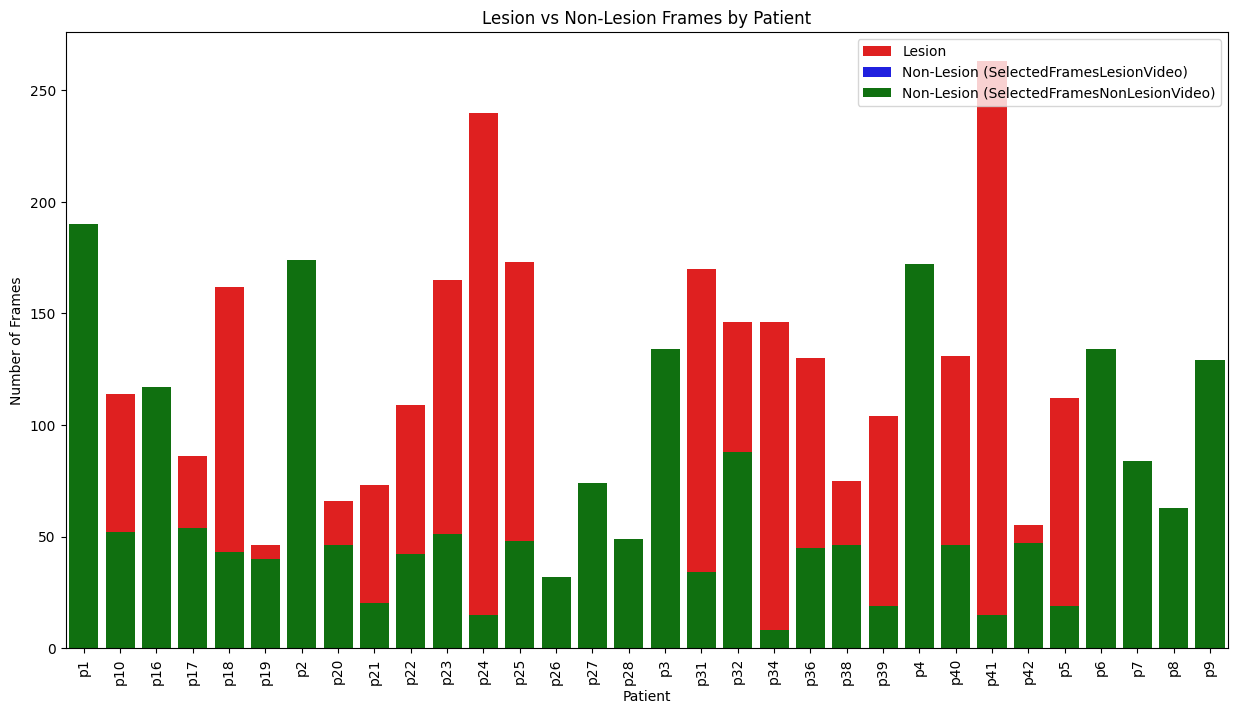

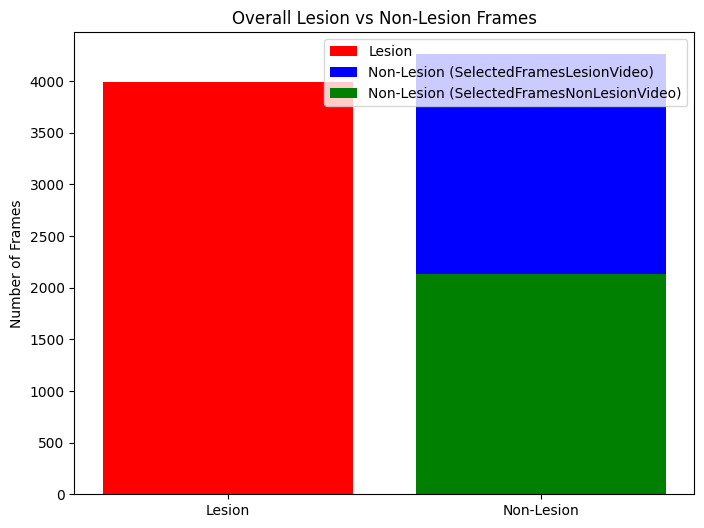

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los frames lesionados y no lesionados por paciente
lesion_counts = df[df['Lesion']].groupby('Patient').size().reset_index(name='Lesion')
non_lesion_counts = df[~df['Lesion']].groupby('Patient').size().reset_index(name='Non_Lesion')
selected_frames_lesion_video_counts = df[(~df['Lesion']) & df['SelectedFramesLesionVideo'].notna()].groupby('Patient').size().reset_index(name='SelectedFramesLesionVideo_NonLesion')
selected_frames_non_lesion_video_counts = df[(~df['Lesion']) & df['SelectedFramesNonLesionVideo'].notna()].groupby('Patient').size().reset_index(name='SelectedFramesNonLesionVideo_NonLesion')

# Unir los datos en un solo DataFrame
counts_df = lesion_counts.merge(non_lesion_counts, on='Patient').merge(selected_frames_lesion_video_counts, on='Patient').merge(selected_frames_non_lesion_video_counts, on='Patient')

# Gráfica por paciente
plt.figure(figsize=(15, 8))
sns.barplot(x='Patient', y='Lesion', data=counts_df, color='red', label='Lesion')
sns.barplot(x='Patient', y='SelectedFramesLesionVideo_NonLesion', data=counts_df, color='blue', label='Non-Lesion (SelectedFramesLesionVideo)')
sns.barplot(x='Patient', y='SelectedFramesNonLesionVideo_NonLesion', data=counts_df, color='green', label='Non-Lesion (SelectedFramesNonLesionVideo)')
plt.legend(loc='upper right')
plt.xlabel('Patient')
plt.ylabel('Number of Frames')
plt.title('Lesion vs Non-Lesion Frames by Patient')
plt.xticks(rotation=90)
plt.show()

# Gráfica overall de lesion/no lesión
overall_lesion = df['Lesion'].sum()
overall_non_lesion = (~df['Lesion']).sum()
overall_selected_frames_lesion_video = ((~df['Lesion']) & df['SelectedFramesLesionVideo'].notna()).sum()
overall_selected_frames_non_lesion_video = ((~df['Lesion']) & df['SelectedFramesNonLesionVideo'].notna()).sum()

plt.figure(figsize=(8, 6))
plt.bar(['Lesion'], [overall_lesion], color='red', label='Lesion')
plt.bar(['Non-Lesion'], [overall_selected_frames_lesion_video], color='blue', bottom=overall_selected_frames_non_lesion_video, label='Non-Lesion (SelectedFramesLesionVideo)')
plt.bar(['Non-Lesion'], [overall_selected_frames_non_lesion_video], color='green', label='Non-Lesion (SelectedFramesNonLesionVideo)')
plt.legend(loc='upper right')
plt.ylabel('Number of Frames')
plt.title('Overall Lesion vs Non-Lesion Frames')
plt.show()


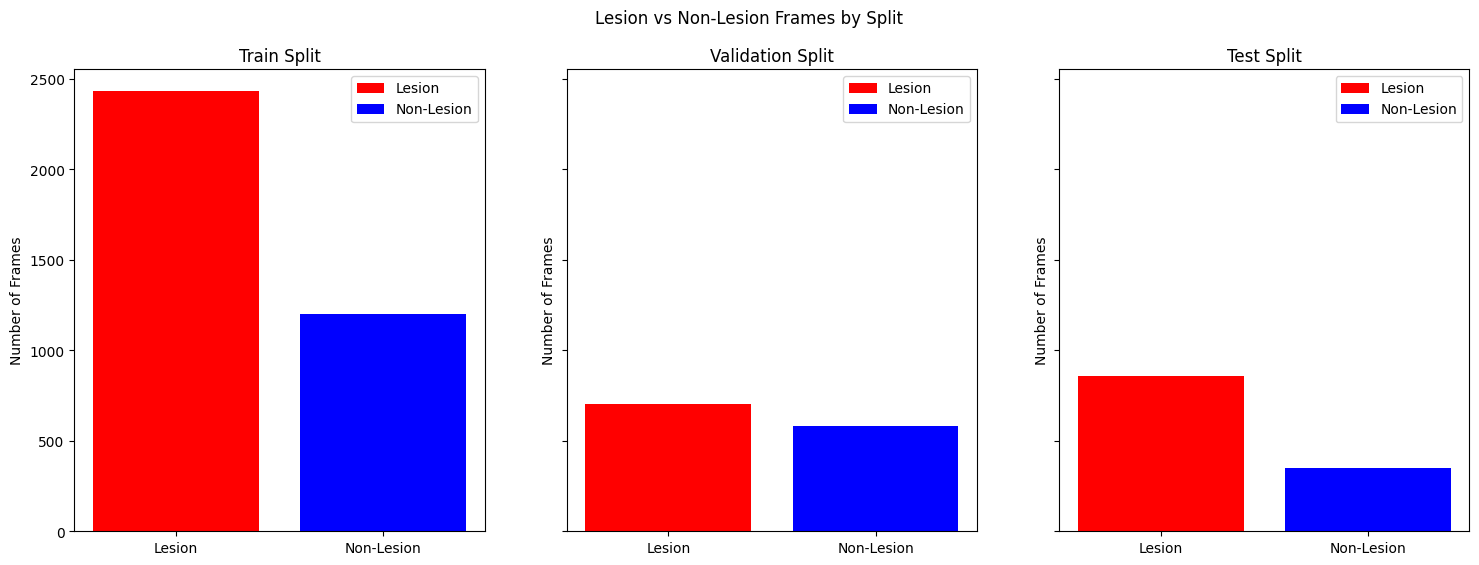

In [15]:
from sklearn.model_selection import train_test_split

# Crear splits
train_val_videos, test_videos = train_test_split(df['video_paciente'].unique(), test_size=0.2, random_state=90)
train_videos, val_videos = train_test_split(train_val_videos, test_size=0.25, random_state=90)  # 0.25 * 0.8 = 0.2

# Crear DataFrames para cada split
train_df = df[df['video_paciente'].isin(train_videos)]
val_df = df[df['video_paciente'].isin(val_videos)]
test_df = df[df['video_paciente'].isin(test_videos)]

# Contar frames lesionados y no lesionados para cada split
def count_lesion_non_lesion(dataframe):
    lesion = dataframe['Lesion'].sum()
    non_lesion = (~dataframe['Lesion']).sum()
    return lesion, non_lesion

train_lesion, train_non_lesion = count_lesion_non_lesion(train_df)
val_lesion, val_non_lesion = count_lesion_non_lesion(val_df)
test_lesion, test_non_lesion = count_lesion_non_lesion(test_df)

# Graficar los resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
splits = ['Train', 'Validation', 'Test']
lesion_counts = [train_lesion, val_lesion, test_lesion]
non_lesion_counts = [train_non_lesion, val_non_lesion, test_non_lesion]

for i, ax in enumerate(axes):
    ax.bar(['Lesion'], [lesion_counts[i]], color='red', label='Lesion')
    ax.bar(['Non-Lesion'], [non_lesion_counts[i]], color='blue', label='Non-Lesion')
    ax.set_title(f'{splits[i]} Split')
    ax.set_ylabel('Number of Frames')
    ax.legend()

plt.suptitle('Lesion vs Non-Lesion Frames by Split')
plt.show()
